## Kommentare füge ich noch hinzu! Erstmal nur der Code.
### Auch die Reihenfolge kann sich noch ändern
#### Wichtig ist, dass alle Zellen über einer Zelle ausgeführt werden müssen, damit die Zellen darunter funktionieren!
#### Außerdem, können die lambda-Methoden eine Weile dauern

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [6]:
boston_2018_data = pd.read_csv('boston_2018.csv')
boston_2018_data.head(10)

start_time             end_time  start_station_id  end_station_id  \
0  2018-01-01 00:16:33  2018-01-01 00:23:01               178             107   
1  2018-01-01 00:42:00  2018-01-01 00:46:25                78             225   
2  2018-01-01 00:42:44  2018-01-01 01:02:11                16              76   
3  2018-01-01 00:56:50  2018-01-01 01:11:06                69             177   
4  2018-01-01 01:07:54  2018-01-01 01:16:02                 4              46   
5  2018-01-01 01:15:59  2018-01-01 01:17:21                31             186   
6  2018-01-01 01:35:37  2018-01-01 01:42:35                51             222   
7  2018-01-01 01:35:46  2018-01-01 01:45:11               189             178   
8  2018-01-01 01:45:04  2018-01-01 01:53:40               108             176   
9  2018-01-01 01:56:58  2018-01-01 02:06:13               185             178   

                                  start_station_name  \
0                    MIT Pacific St at Purrington St   
1                          Union Square - Somerville   
2        Back Bay T Stop - Dartmouth St at Stuart St   
3            Coolidge Corner - Beacon St @ Centre St   
4                        Tremont St at E Berkeley St   
5          Seaport Hotel - Congress St at Seaport Ln   
6                          Washington St at Lenox St   
7                                          Kendall T   
8  Harvard University / SEAS Cruft-Pierce Halls a...   
9                                    Third at Binney   

                                    end_station_name  bike_id   user_type  
0                                 Ames St at Main St      643  Subscriber  
1  Cambridge Dept. of Public Works -147 Hampshire...     1581  Subscriber  
2  Central Sq Post Office / Cambridge City Hall a...      173  Subscriber  
3                                    University Park     1772  Subscriber  
4  Christian Science Plaza - Massachusetts Ave at...     1183  Subscriber  
5                        Congress St at Northern Ave     1793  Subscriber  
6                                        Troy Boston       60  Subscriber  
7                    MIT Pacific St at Purrington St      371  Subscriber  
8                                  Lesley University      961  Subscriber  
9                    MIT Pacific St at Purrington St     1286  Subscriber

In [7]:
len(boston_2018_data)-len(boston_2018_data.dropna())

0

In [8]:
boston_2018_data_clean = boston_2018_data.dropna(axis=0)
boston_2018_data_clean.head(1000000)

start_time                  end_time  start_station_id  \
0            2018-01-01 00:16:33       2018-01-01 00:23:01               178   
1            2018-01-01 00:42:00       2018-01-01 00:46:25                78   
2            2018-01-01 00:42:44       2018-01-01 01:02:11                16   
3            2018-01-01 00:56:50       2018-01-01 01:11:06                69   
4            2018-01-01 01:07:54       2018-01-01 01:16:02                 4   
...                          ...                       ...               ...   
999995  2018-08-15 18:25:56.7200  2018-08-15 18:56:06.9810                35   
999996  2018-08-15 18:25:55.7250  2018-08-15 18:32:33.6170               139   
999997  2018-08-15 18:25:58.2320  2018-08-15 18:32:30.2600                80   
999998  2018-08-15 18:25:56.3940  2018-08-16 09:18:15.8990                52   
999999  2018-08-15 18:25:59.1560  2018-08-15 18:32:31.7440               189   

        end_station_id                           start_station_name  \
0                  107              MIT Pacific St at Purrington St   
1                  225                    Union Square - Somerville   
2                   76  Back Bay T Stop - Dartmouth St at Stuart St   
3                  177      Coolidge Corner - Beacon St @ Centre St   
4                   46                  Tremont St at E Berkeley St   
...                ...                                          ...   
999995              32                       Arch St at Franklin St   
999996              87                                    Dana Park   
999997             178      MIT Stata Center at Vassar St / Main St   
999998              36                    Newbury St at Hereford St   
999999              67                                    Kendall T   

                                         end_station_name  bike_id   user_type  
0                                      Ames St at Main St      643  Subscriber  
1       Cambridge Dept. of Public Works -147 Hampshire...     1581  Subscriber  
2       Central Sq Post Office / Cambridge City Hall a...      173  Subscriber  
3                                         University Park     1772  Subscriber  
4       Christian Science Plaza - Massachusetts Ave at...     1183  Subscriber  
...                                                   ...      ...         ...  
999995         Landmark Center - Brookline Ave at Park Dr      838  Subscriber  
999996  Harvard University Housing - 115 Putnam Ave at...     3189  Subscriber  
999997                    MIT Pacific St at Purrington St       99  Subscriber  
999998        Copley Square - Dartmouth St at Boylston St     3199  Subscriber  
999999                       MIT at Mass Ave / Amherst St     2780  Subscriber  

[1000000 rows x 8 columns]

In [9]:
def clean_date(x):
    return x.split('.')[0]

boston_2018_data_clean['start_time'] = boston_2018_data_clean['start_time'].apply(lambda x: clean_date(x))
boston_2018_data_clean['end_time'] = boston_2018_data_clean['end_time'].apply(lambda x: clean_date(x))
boston_2018_data_clean.head(1000000)

start_time             end_time  start_station_id  \
0       2018-01-01 00:16:33  2018-01-01 00:23:01               178   
1       2018-01-01 00:42:00  2018-01-01 00:46:25                78   
2       2018-01-01 00:42:44  2018-01-01 01:02:11                16   
3       2018-01-01 00:56:50  2018-01-01 01:11:06                69   
4       2018-01-01 01:07:54  2018-01-01 01:16:02                 4   
...                     ...                  ...               ...   
999995  2018-08-15 18:25:56  2018-08-15 18:56:06                35   
999996  2018-08-15 18:25:55  2018-08-15 18:32:33               139   
999997  2018-08-15 18:25:58  2018-08-15 18:32:30                80   
999998  2018-08-15 18:25:56  2018-08-16 09:18:15                52   
999999  2018-08-15 18:25:59  2018-08-15 18:32:31               189   

        end_station_id                           start_station_name  \
0                  107              MIT Pacific St at Purrington St   
1                  225                    Union Square - Somerville   
2                   76  Back Bay T Stop - Dartmouth St at Stuart St   
3                  177      Coolidge Corner - Beacon St @ Centre St   
4                   46                  Tremont St at E Berkeley St   
...                ...                                          ...   
999995              32                       Arch St at Franklin St   
999996              87                                    Dana Park   
999997             178      MIT Stata Center at Vassar St / Main St   
999998              36                    Newbury St at Hereford St   
999999              67                                    Kendall T   

                                         end_station_name  bike_id   user_type  
0                                      Ames St at Main St      643  Subscriber  
1       Cambridge Dept. of Public Works -147 Hampshire...     1581  Subscriber  
2       Central Sq Post Office / Cambridge City Hall a...      173  Subscriber  
3                                         University Park     1772  Subscriber  
4       Christian Science Plaza - Massachusetts Ave at...     1183  Subscriber  
...                                                   ...      ...         ...  
999995         Landmark Center - Brookline Ave at Park Dr      838  Subscriber  
999996  Harvard University Housing - 115 Putnam Ave at...     3189  Subscriber  
999997                    MIT Pacific St at Purrington St       99  Subscriber  
999998        Copley Square - Dartmouth St at Boylston St     3199  Subscriber  
999999                       MIT at Mass Ave / Amherst St     2780  Subscriber  

[1000000 rows x 8 columns]

In [10]:
def get_date(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()

def get_weekday(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday()

def get_hour(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour

def get_month(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month

In [11]:
boston_2018_data_clean.reset_index(drop=True)
boston_2018_data_clean['date'] = boston_2018_data_clean['start_time'].apply(lambda x: get_date(x))

In [12]:
boston_2018_data_clean['weekday'] = boston_2018_data_clean['start_time'].apply(lambda x: get_weekday(x))

In [13]:
boston_2018_data_clean['hour'] = boston_2018_data_clean['start_time'].apply(lambda x: get_hour(x))

In [14]:
boston_2018_data_clean['month'] = boston_2018_data_clean['start_time'].apply(lambda x: get_month(x))

In [15]:
boston_2018_data_clean.head(5)

start_time             end_time  start_station_id  end_station_id  \
0  2018-01-01 00:16:33  2018-01-01 00:23:01               178             107   
1  2018-01-01 00:42:00  2018-01-01 00:46:25                78             225   
2  2018-01-01 00:42:44  2018-01-01 01:02:11                16              76   
3  2018-01-01 00:56:50  2018-01-01 01:11:06                69             177   
4  2018-01-01 01:07:54  2018-01-01 01:16:02                 4              46   

                            start_station_name  \
0              MIT Pacific St at Purrington St   
1                    Union Square - Somerville   
2  Back Bay T Stop - Dartmouth St at Stuart St   
3      Coolidge Corner - Beacon St @ Centre St   
4                  Tremont St at E Berkeley St   

                                    end_station_name  bike_id   user_type  \
0                                 Ames St at Main St      643  Subscriber   
1  Cambridge Dept. of Public Works -147 Hampshire...     1581  Subscriber   
2  Central Sq Post Office / Cambridge City Hall a...      173  Subscriber   
3                                    University Park     1772  Subscriber   
4  Christian Science Plaza - Massachusetts Ave at...     1183  Subscriber   

         date  weekday  hour  month  
0  2018-01-01        0     0      1  
1  2018-01-01        0     0      1  
2  2018-01-01        0     0      1  
3  2018-01-01        0     0      1  
4  2018-01-01        0     1      1

In [16]:
bike_stations = pd.read_csv('current_bluebikes_stations.csv')
bike_stations.head(5)

Last Updated                         May 7th 2021   Unnamed: 2  \
0       Number                                 Name     Latitude   
1       W32006                          160 Arsenal  42.36466403   
2       A32019                     175 N Harvard St    42.363796   
3       S32035                        191 Beacon St  42.38032335   
4       C32094  2 Hummingbird Lane at Olmsted Green     42.28887   

     Unnamed: 3  Unnamed: 4 Unnamed: 5   Unnamed: 6  
0     Longitude    District     Public  Total docks  
1  -71.17569387   Watertown        Yes           11  
2    -71.129164      Boston        Yes           18  
3  -71.10878613  Somerville        Yes           19  
4    -71.095003      Boston        Yes           17

In [17]:
len(bike_stations) - len(bike_stations.dropna())

0

In [18]:
bike_stations.columns = bike_stations.iloc[0]
bike_stations.drop(bike_stations.index[0])

0    Number                                 Name     Latitude     Longitude  \
1    W32006                          160 Arsenal  42.36466403  -71.17569387   
2    A32019                     175 N Harvard St    42.363796    -71.129164   
3    S32035                        191 Beacon St  42.38032335  -71.10878613   
4    C32094  2 Hummingbird Lane at Olmsted Green     42.28887    -71.095003   
5    S32023                           30 Dane St  42.38100143  -71.10402523   
..      ...                                  ...          ...           ...   
368  N32006                   West Newton Armory  42.34947178  -71.22000679   
369  A32043         Western Ave at Richardson St  42.36178741  -71.14393111   
370  B32059            Whittier St Health Center  42.33286288  -71.09218862   
371  D32040         Williams St at Washington St    42.306539    -71.107669   
372  S32005                        Wilson Square  42.38567579  -71.11412136   

0      District Public Total docks  
1     Watertown    Yes          11  
2        Boston    Yes          18  
3    Somerville    Yes          19  
4        Boston    Yes          17  
5    Somerville    Yes          15  
..          ...    ...         ...  
368      Newton    Yes          11  
369      Boston    Yes          19  
370      Boston    Yes          19  
371      Boston    Yes          19  
372  Somerville    Yes          15  

[372 rows x 7 columns]

In [19]:
boston_2018_start_geodata = pd.merge(boston_2018_data_clean, bike_stations[['Name','Latitude', 'Longitude', 'District']], left_on="start_station_name", right_on="Name", how="left")
boston_2018_start_geodata = boston_2018_start_geodata.rename(columns = {'Latitude':'latitude_start','Longitude':'longitude_start',"District":"district_start"})
del boston_2018_start_geodata['Name']

boston_2018_trip_geodata = pd.merge(boston_2018_start_geodata, bike_stations[['Name','Latitude', 'Longitude', 'District']], left_on="end_station_name", right_on="Name", how="left")
boston_2018_trip_geodata = boston_2018_trip_geodata.rename(columns = {'Latitude':'latitude_end','Longitude':'longitude_end',"District":"district_end"})
del boston_2018_trip_geodata['Name']

boston_2018_trip_geodata.head(5)

start_time             end_time  start_station_id  end_station_id  \
0  2018-01-01 00:16:33  2018-01-01 00:23:01               178             107   
1  2018-01-01 00:42:00  2018-01-01 00:46:25                78             225   
2  2018-01-01 00:42:44  2018-01-01 01:02:11                16              76   
3  2018-01-01 00:56:50  2018-01-01 01:11:06                69             177   
4  2018-01-01 01:07:54  2018-01-01 01:16:02                 4              46   

                            start_station_name  \
0              MIT Pacific St at Purrington St   
1                    Union Square - Somerville   
2  Back Bay T Stop - Dartmouth St at Stuart St   
3      Coolidge Corner - Beacon St @ Centre St   
4                  Tremont St at E Berkeley St   

                                    end_station_name  bike_id   user_type  \
0                                 Ames St at Main St      643  Subscriber   
1  Cambridge Dept. of Public Works -147 Hampshire...     1581  Subscriber   
2  Central Sq Post Office / Cambridge City Hall a...      173  Subscriber   
3                                    University Park     1772  Subscriber   
4  Christian Science Plaza - Massachusetts Ave at...     1183  Subscriber   

         date  weekday  hour  month latitude_start longitude_start  \
0  2018-01-01        0     0      1     42.3595732    -71.10129476   
1  2018-01-01        0     0      1    42.37971603    -71.09391332   
2  2018-01-01        0     0      1    42.34807412    -71.07657015   
3  2018-01-01        0     0      1            NaN             NaN   
4  2018-01-01        0     1      1      42.345392      -71.069616   

  district_start latitude_end longitude_end district_end  
0      Cambridge      42.3625     -71.08822    Cambridge  
1     Somerville  42.37119728  -71.09759867    Cambridge  
2         Boston    42.366426    -71.105495    Cambridge  
3            NaN  42.36264779  -71.10006094    Cambridge  
4         Boston  42.34366582  -71.08582377       Boston

In [20]:
boston_2018_trip_geodata_clean = boston_2018_trip_geodata.dropna(axis=0)
print(boston_2018_trip_geodata_clean)


                  start_time             end_time  start_station_id  \
0        2018-01-01 00:16:33  2018-01-01 00:23:01               178   
1        2018-01-01 00:42:00  2018-01-01 00:46:25                78   
2        2018-01-01 00:42:44  2018-01-01 01:02:11                16   
4        2018-01-01 01:07:54  2018-01-01 01:16:02                 4   
5        2018-01-01 01:15:59  2018-01-01 01:17:21                31   
...                      ...                  ...               ...   
1767801  2018-12-31 23:48:46  2018-12-31 23:56:55                19   
1767802  2018-12-31 23:48:58  2019-01-01 03:13:49                40   
1767803  2018-12-31 23:51:19  2019-01-01 00:17:15                68   
1767804  2018-12-31 23:54:16  2018-12-31 23:57:17               352   
1767805  2018-12-31 23:54:38  2018-12-31 23:59:30               352   

         end_station_id                           start_station_name  \
0                   107              MIT Pacific St at Purrington St   
1  

# Geographical analysis

## General demand

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import timeit

In [22]:
boston_2018_trip_geodata_clean = boston_2018_trip_geodata.dropna(axis=0)

In [23]:
boston_2018_trip_geodata_clean["Coordinates"] = list(zip(boston_2018_trip_geodata_clean["latitude_start"],boston_2018_trip_geodata_clean["longitude_start"]))

In [24]:
bike_list = boston_2018_trip_geodata_clean["bike_id"].unique()
selected_bike_ID = random.choice(bike_list)

In [25]:
#define new map

demand_heat_map = folium.Map(location=(42.337510, -71.067966),tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

demand_heat_map.add_child(plugins.HeatMap(boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

folium.TileLayer('stamentoner').add_to(demand_heat_map)
folium.TileLayer('cartodbpositron').add_to(demand_heat_map)
folium.TileLayer('openstreetmap').add_to(demand_heat_map)
folium.LayerControl().add_to(demand_heat_map)

demand_heat_map

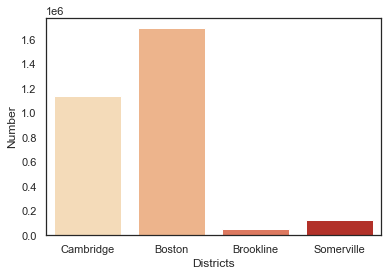

In [132]:

# rows in which 'district_start' is 'specific one'
count_cambridge = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Cambridge" else False, axis = 1)
count_somerville = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Somerville" else False, axis = 1)
count_boston = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Boston" else False, axis = 1)
count_brookline = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Brookline" else False, axis = 1)

# rows in which 'district_end' is 'specific one'
count_cambridge = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Cambridge" else False, axis = 1)
count_somerville = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Somerville" else False, axis = 1)
count_boston = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Boston" else False, axis = 1)
count_brookline = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Brookline" else False, axis = 1)

# Count number of True in the series
num_rows_c = len(count_cambridge[count_cambridge == True].index)
num_rows_s = len(count_somerville[count_somerville == True].index)
num_rows_bo = len(count_boston[count_boston == True].index)
num_rows_br = len(count_brookline[count_brookline == True].index)

num_rows_c0 = len(count_cambridge[count_cambridge == True].index)
num_rows_s1 = len(count_somerville[count_somerville == True].index)
num_rows_bo2 = len(count_boston[count_boston == True].index)
num_rows_br3 = len(count_brookline[count_brookline == True].index)

# point = boston_2018_trip_geodata_clean.apply(lambda x: get_district_end(x))

data = {'Districts':  ['Cambridge', 'Boston', 'Brookline', 'Somerville'],
        'Number': [num_rows_c0 + num_rows_c, num_rows_bo2 + num_rows_bo, num_rows_br3 + num_rows_br, num_rows_s1 + num_rows_s]
        }

df = pd.DataFrame (data, columns = ['Districts','Number'])

g = sns.barplot(x="Districts", y="Number", data=df, palette="OrRd")
plt.show()


## Start Demand

In [27]:
#define new map

s_demand_heat_map = folium.Map(location=(42.337510, -71.067966),  tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

s_demand_heat_map.add_child(plugins.HeatMap(boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

folium.TileLayer('stamentoner').add_to(s_demand_heat_map)
folium.TileLayer('cartodbpositron').add_to(s_demand_heat_map)
folium.TileLayer('openstreetmap').add_to(s_demand_heat_map)
folium.LayerControl().add_to(s_demand_heat_map)

s_demand_heat_map

  District_start  Number
0      Cambridge  575833
1         Boston  834371
2      Brookline   25844
3     Somerville   62445


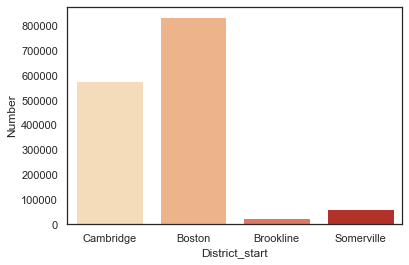

In [131]:

# rows in which 'district_start' is 'specific one'
count_cambridge = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Cambridge" else False, axis = 1)
count_somerville = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Somerville" else False, axis = 1)
count_boston = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Boston" else False, axis = 1)
count_brookline = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_start'] == "Brookline" else False, axis = 1)

# Count number of True in the series
num_rows_c0 = len(count_cambridge[count_cambridge == True].index)
num_rows_s1 = len(count_somerville[count_somerville == True].index)
num_rows_bo2 = len(count_boston[count_boston == True].index)
num_rows_br3 = len(count_brookline[count_brookline == True].index)

data = {'District_start':  ['Cambridge', 'Boston', 'Brookline', 'Somerville'],
        'Number': [num_rows_c0, num_rows_bo2, num_rows_br3, num_rows_s1]
        }

df = pd.DataFrame (data, columns = ['District_start','Number'])
print(df)

sns.barplot(x="District_start", y="Number", data=df, palette="OrRd")
plt.show()

## End Demand

In [29]:
#define new map

e_demand_heat_map = folium.Map(location=(42.337510, -71.067966),  tiles='Stamen Terrain', 
                       zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

e_demand_heat_map.add_child(plugins.HeatMap(boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

folium.TileLayer('stamentoner').add_to(e_demand_heat_map)
folium.TileLayer('cartodbpositron').add_to(e_demand_heat_map)
folium.TileLayer('openstreetmap').add_to(e_demand_heat_map)
folium.LayerControl().add_to(e_demand_heat_map)

e_demand_heat_map

  District_end  Number
0    Cambridge  567737
1       Boston  844779
2    Brookline   24185
3   Somerville   61792


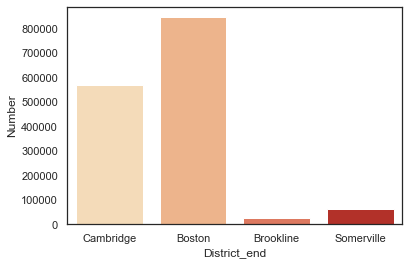

In [130]:

# rows in which 'district_end' is 'specific one'
count_cambridge = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Cambridge" else False, axis = 1)
count_somerville = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Somerville" else False, axis = 1)
count_boston = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Boston" else False, axis = 1)
count_brookline = boston_2018_trip_geodata_clean.apply(lambda x : True
            if x['district_end'] == "Brookline" else False, axis = 1)

# Count number of True in the series
num_rows_c = len(count_cambridge[count_cambridge == True].index)
num_rows_s = len(count_somerville[count_somerville == True].index)
num_rows_bo = len(count_boston[count_boston == True].index)
num_rows_br = len(count_brookline[count_brookline == True].index)

data = {'District_end':  ['Cambridge', 'Boston', 'Brookline', 'Somerville'],
        'Number': [num_rows_c, num_rows_bo, num_rows_br, num_rows_s]
        }

df = pd.DataFrame (data, columns = ['District_end','Number'])
print(df) 

sns.barplot(x="District_end", y="Number", data=df, palette="OrRd")
plt.show()

## Compare start and end
Here you can see the difference between tour starts and tour ends in the districts. For example, a positive value means that there were more tour starts than tour ends in the respective district

     District  Difference
0   Cambridge        8096
1      Boston      -10408
2   Brookline        1659
3  Somerville         653


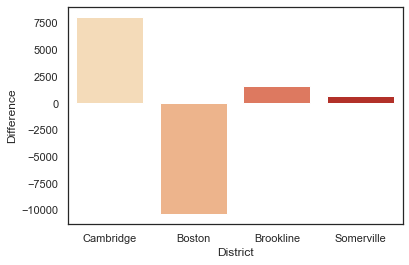

In [129]:
difference = {"District": ["Cambridge", "Boston", "Brookline", "Somerville"],
                "Difference": [(num_rows_c0-num_rows_c), (num_rows_bo2-num_rows_bo), (num_rows_br3-num_rows_br), (num_rows_s1-num_rows_s)]
}
diff = pd.DataFrame (difference, columns = ["District",'Difference'])
print(diff) 

sns.barplot(x="District", y="Difference", data=diff, palette="OrRd")
plt.show()

## Choropleth Map of Boston

### Convert lat and long coordinates into zipcodes  
This step takes much time. For 1000 conversions about 5 minutes. We convert the lang and long into the zip code.

In [31]:
import geopy
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#longlat = boston_2018_trip_geodata_clean
geolocator = geopy.Nominatim(user_agent="check_1")


    
def get_zip_code(x):
    location = geolocator.reverse("{}, {}".format(x['latitude_start'],x['longitude_start']))
    try:
        return (location.raw['address']['postcode'])
    except:
        return (None, None)
boston_2018_trip_geodata_clean['zipcode'] = boston_2018_trip_geodata_clean.head(1000).apply(lambda x: get_zip_code(x), axis = 1)
print(boston_2018_trip_geodata_clean.head(10))

             start_time             end_time  start_station_id  \
0   2018-01-01 00:16:33  2018-01-01 00:23:01               178   
1   2018-01-01 00:42:00  2018-01-01 00:46:25                78   
2   2018-01-01 00:42:44  2018-01-01 01:02:11                16   
4   2018-01-01 01:07:54  2018-01-01 01:16:02                 4   
5   2018-01-01 01:15:59  2018-01-01 01:17:21                31   
6   2018-01-01 01:35:37  2018-01-01 01:42:35                51   
7   2018-01-01 01:35:46  2018-01-01 01:45:11               189   
8   2018-01-01 01:45:04  2018-01-01 01:53:40               108   
9   2018-01-01 01:56:58  2018-01-01 02:06:13               185   
10  2018-01-01 02:01:28  2018-01-01 02:08:09                95   

    end_station_id                                 start_station_name  \
0              107                    MIT Pacific St at Purrington St   
1              225                          Union Square - Somerville   
2               76        Back Bay T Stop - Dartmouth 

### Choropleth map of greater boston 
In this visualization you can see boston and its surrounding districts. Here you can read and recognise the demand much better than in the heatmaps before. For this, the individual incidents are no longer precisely localised.   

In [32]:
# definition of the boundaries in the map
boston_and_greater = r'boston_and_greater.json'

# calculating total number of incidents per district
data2 = pd.DataFrame(boston_2018_trip_geodata_clean['bike_id'].value_counts().astype(float))
data2.to_json('map.json')
data2 = data2.reset_index()
data2.columns = ['zipcode', 'bike_id']
  
# creation of the choropleth
simple_map = folium.Map(location=(42.337510, -71.067966), zoom_start=12)

#Boston and greater
folium.Choropleth(
    geo_data = boston_and_greater,
    name="Boston_and_greater",
    data=boston_2018_trip_geodata_clean,
    columns=["zipcode", 'bike_id'],
    key_on='feature.properties.ZIP5',
    fill_color="YlOrRd",
    fill_opacity=0.7,
   line_opacity=1.0,
).add_to(simple_map)

#add tilelayers 
folium.TileLayer('openstreetmap').add_to(simple_map)
folium.TileLayer('Stamen Terrain').add_to(simple_map)
folium.TileLayer('cartodbpositron').add_to(simple_map)
folium.LayerControl().add_to(simple_map)
               
display(simple_map)

In this map you can choose the districts you want to see through the layers and the layer control. For example, if you only want to see the demand in Brookline and Cambridge, then only pick these two in the layer control.

In [226]:
# definition of the boundaries in the map
boston_and_greater = r'boston_and_greater.json'
Boston = r'ZIP_Codes.geojson'
Cambridge = r'Cambridge_Zipcodes.geojson'
Somerville = r'somerville.json'
Brookline = r'brookline.json'

# calculating total number of incidents per district
data2 = pd.DataFrame(boston_2018_trip_geodata_clean['bike_id'].value_counts().astype(float))
data2.to_json('map.json')
data2 = data2.reset_index()
data2.columns = ['zipcode', 'bike_id']
  
# creation of the choropleth
whole_map = folium.Map(location=(42.337510, -71.067966), zoom_start=12)

# #Boston and greater
# folium.Choropleth(
#     geo_data = boston_and_greater,
#     name="Boston_and_greater",
#     data=boston_2018_trip_geodata_clean,
#     columns=["zipcode", 'bike_id'],
#     key_on='feature.properties.ZIP5',
#     fill_color="YlGnBu",
#     fill_opacity=0.7,
#    line_opacity=1.0,
# ).add_to(whole_map)

# Boston
folium.Choropleth(
    geo_data = Boston,
    name="Boston",
    data=boston_2018_trip_geodata_clean,
    columns=["zipcode", 'bike_id'],
    key_on='feature.properties.ZIP5',
    fill_color="Blues",
    fill_opacity=0.7,
   line_opacity=1.0,
    legend_name="Usage per district",
).add_to(whole_map)

# Somerville
folium.Choropleth(
    geo_data = Somerville,
    name="Somerville",
    data=boston_2018_trip_geodata_clean,
    columns=["zipcode", 'bike_id'],
    key_on='feature.properties.ZIP5',
    fill_color="Greens",
    fill_opacity=0.7,
   line_opacity=1.0,
    legend_name="Usage per district",
).add_to(whole_map)

# Cambridge
folium.Choropleth(
    geo_data = Cambridge,
    name="Cambridge",
    data=boston_2018_trip_geodata_clean,
    columns=["zipcode", 'bike_id'],
    key_on='feature.properties.ZIP_CODE',
    fill_color="Reds",
    fill_opacity=0.7,
   line_opacity=1.0,
).add_to(whole_map)

# Brookline
folium.Choropleth(
    geo_data = Brookline,
    name="Brookline",
    data=boston_2018_trip_geodata_clean,
    columns=["zipcode", 'bike_id'],
    key_on='feature.properties.ZIP5',
    fill_color="Purples",
    fill_opacity=0.7,
   line_opacity=1.0,
).add_to(whole_map)

        
#add tilelayers 
folium.TileLayer('openstreetmap').add_to(whole_map)
folium.TileLayer('Stamen Terrain').add_to(whole_map)
folium.TileLayer('cartodbpositron').add_to(whole_map)
folium.LayerControl().add_to(whole_map)
               
display(whole_map)

# KPI Most popular station

## Most popular start station

In [196]:
import numpy as np 

#start & end over the whole year
start_station_list = boston_2018_trip_geodata_clean["start_station_name"].unique()
end_station_list = boston_2018_trip_geodata_clean["end_station_name"].unique()

freq1 = boston_2018_trip_geodata_clean['start_station_name'].value_counts()  
freq2 = boston_2018_trip_geodata_clean['end_station_name'].value_counts()

freq1pd = pd.DataFrame({
                        'anzahl': freq1
                       })

In [197]:
# counts the frequency of the station names during a specific hour over the whole year
freq_0 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 0]['start_station_name'].value_counts() 
freq_1 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 1]['start_station_name'].value_counts() 
freq_2 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 2]['start_station_name'].value_counts() 
freq_3 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 3]['start_station_name'].value_counts() 
freq_4 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 4]['start_station_name'].value_counts() 
freq_5 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 5]['start_station_name'].value_counts() 
freq_6 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 6]['start_station_name'].value_counts() 
freq_7 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 7]['start_station_name'].value_counts() 
freq_8 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 8]['start_station_name'].value_counts() 
freq_9 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 9]['start_station_name'].value_counts() 
freq_10 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 10]['start_station_name'].value_counts() 
freq_11 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 11]['start_station_name'].value_counts() 
freq_12 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 12]['start_station_name'].value_counts() 
freq_13 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 13]['start_station_name'].value_counts() 
freq_14 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 14]['start_station_name'].value_counts() 
freq_15 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 15]['start_station_name'].value_counts() 
freq_16 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 16]['start_station_name'].value_counts() 
freq_17 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 17]['start_station_name'].value_counts() 
freq_18 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 18]['start_station_name'].value_counts() 
freq_19 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 19]['start_station_name'].value_counts() 
freq_20 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 20]['start_station_name'].value_counts() 
freq_21 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 21]['start_station_name'].value_counts() 
freq_22 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 22]['start_station_name'].value_counts() 
freq_23 = boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 23]['start_station_name'].value_counts() 

In [198]:
freq_h = pd.DataFrame({
    0: freq_0,
    1: freq_1,
    2: freq_2,
    3: freq_3,
    4: freq_4,
    5: freq_5,
    6: freq_6,
    7: freq_7,
    8: freq_8,
    9: freq_9,
    10: freq_10,
    11: freq_11,
    12: freq_12,
    13: freq_13,
    14: freq_14,
    15: freq_15,
    16: freq_16,
    17: freq_17,
    18: freq_18,
    19: freq_19,
    20: freq_20,
    21: freq_21,
    22: freq_22,
    23: freq_23
}); 
freq_h = freq_h.fillna(0)
freq_h.head(5)

0     1     2     3     4   \
175 N Harvard St                           41.0  24.0  19.0  11.0   8.0   
191 Beacon St                               1.0   0.0   0.0   0.0   0.0   
359 Broadway - Broadway at Fayette Street  44.0  15.0  15.0   5.0  25.0   
699 Mt Auburn St                            2.0   1.0   1.0   0.0   0.0   
700 Huron Ave                               0.0   0.0   0.0   0.0   0.0   

                                              5      6      7       8   \
175 N Harvard St                            17.0   96.0  508.0  1031.0   
191 Beacon St                                0.0    0.0    2.0    13.0   
359 Broadway - Broadway at Fayette Street  128.0  195.0  884.0  2279.0   
699 Mt Auburn St                             2.0   13.0   68.0   125.0   
700 Huron Ave                                0.0    2.0    7.0    23.0   

                                               9   ...     14     15     16  \
175 N Harvard St                            669.0  ...  433.0  508.0  625.0   
191 Beacon St                                18.0  ...    6.0    4.0    4.0   
359 Broadway - Broadway at Fayette Street  1296.0  ...  423.0  406.0  486.0   
699 Mt Auburn St                             75.0  ...   48.0   61.0   60.0   
700 Huron Ave                                10.0  ...    6.0    4.0    1.0   

                                              17     18     19     20     21  \
175 N Harvard St                           774.0  690.0  606.0  472.0  352.0   
191 Beacon St                                6.0    7.0    4.0    6.0    7.0   
359 Broadway - Broadway at Fayette Street  706.0  512.0  421.0  312.0  176.0   
699 Mt Auburn St                            69.0   44.0   25.0   25.0   12.0   
700 Huron Ave                                1.0    0.0    1.0    0.0    2.0   

                                              22    23  
175 N Harvard St                           187.0  94.0  
191 Beacon St                                1.0   1.0  
359 Broadway - Broadway at Fayette Street  106.0  75.0  
699 Mt Auburn St                             2.0   5.0  
700 Huron Ave                                0.0   0.0  

[5 rows x 24 columns]

In [199]:
# calculate the sum per row
most_pop = np.empty(24)
freq_h['sum'] = 0

for j in range(246):
    for i in range(24):
        most_pop[i] = freq_h[i][j]
    freq_h['sum'][j] = most_pop.sum()

freq_h.head(5)

0     1     2     3     4  \
175 N Harvard St                           41.0  24.0  19.0  11.0   8.0   
191 Beacon St                               1.0   0.0   0.0   0.0   0.0   
359 Broadway - Broadway at Fayette Street  44.0  15.0  15.0   5.0  25.0   
699 Mt Auburn St                            2.0   1.0   1.0   0.0   0.0   
700 Huron Ave                               0.0   0.0   0.0   0.0   0.0   

                                               5      6      7       8  \
175 N Harvard St                            17.0   96.0  508.0  1031.0   
191 Beacon St                                0.0    0.0    2.0    13.0   
359 Broadway - Broadway at Fayette Street  128.0  195.0  884.0  2279.0   
699 Mt Auburn St                             2.0   13.0   68.0   125.0   
700 Huron Ave                                0.0    2.0    7.0    23.0   

                                                9  ...     15     16     17  \
175 N Harvard St                            669.0  ...  508.0  625.0  774.0   
191 Beacon St                                18.0  ...    4.0    4.0    6.0   
359 Broadway - Broadway at Fayette Street  1296.0  ...  406.0  486.0  706.0   
699 Mt Auburn St                             75.0  ...   61.0   60.0   69.0   
700 Huron Ave                                10.0  ...    4.0    1.0    1.0   

                                              18     19     20     21     22  \
175 N Harvard St                           690.0  606.0  472.0  352.0  187.0   
191 Beacon St                                7.0    4.0    6.0    7.0    1.0   
359 Broadway - Broadway at Fayette Street  512.0  421.0  312.0  176.0  106.0   
699 Mt Auburn St                            44.0   25.0   25.0   12.0    2.0   
700 Huron Ave                                0.0    1.0    0.0    2.0    0.0   

                                             23    sum  
175 N Harvard St                           94.0   9079  
191 Beacon St                               1.0    119  
359 Broadway - Broadway at Fayette Street  75.0  11142  
699 Mt Auburn St                            5.0    911  
700 Huron Ave                               0.0     97  

[5 rows x 25 columns]

In [200]:
# select the most popular start station
most_freq_h = freq_h[freq_h['sum'] > 15000]
most_freq_h.head(5)

0      1      2     3     4  \
Ames St at Main St                           185.0  109.0   61.0  47.0  23.0   
Back Bay T Stop - Dartmouth St at Stuart St  133.0   87.0   50.0  14.0  20.0   
Beacon St at Massachusetts Ave               382.0  247.0  134.0  58.0  34.0   
Boston City Hall - 28 State St               132.0  138.0  115.0  15.0  41.0   
Cambridge St at Joy St                        91.0   72.0   48.0  11.0  21.0   

                                                 5      6       7       8  \
Ames St at Main St                            22.0   79.0   307.0   939.0   
Back Bay T Stop - Dartmouth St at Stuart St   38.0  527.0  1448.0  3072.0   
Beacon St at Massachusetts Ave               131.0  421.0  1270.0  1756.0   
Boston City Hall - 28 State St                74.0  357.0   783.0  2029.0   
Cambridge St at Joy St                       188.0  316.0   837.0  1588.0   

                                                  9  ...      15      16  \
Ames St at Main St                            722.0  ...  1542.0  2904.0   
Back Bay T Stop - Dartmouth St at Stuart St  1095.0  ...   709.0  1615.0   
Beacon St at Massachusetts Ave               1004.0  ...  1187.0  1519.0   
Boston City Hall - 28 State St                994.0  ...  1474.0  1920.0   
Cambridge St at Joy St                       1165.0  ...   765.0  1087.0   

                                                 17      18      19      20  \
Ames St at Main St                           2773.0  1792.0  1207.0   868.0   
Back Bay T Stop - Dartmouth St at Stuart St  2892.0  1898.0   914.0   592.0   
Beacon St at Massachusetts Ave               1724.0  1852.0  1441.0  1211.0   
Boston City Hall - 28 State St               2905.0  1852.0  1063.0   679.0   
Cambridge St at Joy St                       1683.0  1409.0   973.0   588.0   

                                                21     22     23    sum  
Ames St at Main St                           603.0  542.0  327.0  21144  
Back Bay T Stop - Dartmouth St at Stuart St  365.0  338.0  188.0  19315  
Beacon St at Massachusetts Ave               864.0  783.0  623.0  21810  
Boston City Hall - 28 State St               469.0  393.0  277.0  20514  
Cambridge St at Joy St                       347.0  289.0  203.0  15282  

[5 rows x 25 columns]

In [227]:
# plot
figure, axes = plt.subplots(24, 1, figsize=(150, 200))

sns.barplot(x = most_freq_h.index, y=0, data=most_freq_h, ax=axes[0], palette="OrRd")
axes[0].set_title("Most popular start stations")
sns.barplot(x = most_freq_h.index , y=1, data=most_freq_h, ax=axes[1], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=2, data=most_freq_h, ax=axes[2], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=3, data=most_freq_h, ax=axes[3], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=4, data=most_freq_h, ax=axes[4], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=5, data=most_freq_h, ax=axes[5], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=6, data=most_freq_h, ax=axes[6], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=7, data=most_freq_h, ax=axes[7], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=8, data=most_freq_h, ax=axes[8], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=9, data=most_freq_h, ax=axes[9], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=10, data=most_freq_h, ax=axes[10], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=11, data=most_freq_h, ax=axes[11], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=12, data=most_freq_h, ax=axes[12], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=13, data=most_freq_h, ax=axes[13], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=14, data=most_freq_h, ax=axes[14], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=15, data=most_freq_h, ax=axes[15], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=16, data=most_freq_h, ax=axes[16], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=17, data=most_freq_h, ax=axes[17], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=18, data=most_freq_h, ax=axes[18], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=19, data=most_freq_h, ax=axes[19], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=20, data=most_freq_h, ax=axes[20], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=21, data=most_freq_h, ax=axes[21], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=22, data=most_freq_h, ax=axes[22], palette="OrRd")
sns.barplot(x = most_freq_h.index , y=23, data=most_freq_h, ax=axes[23], palette="OrRd")

<AxesSubplot:ylabel='23'>

## Most popular end station

In [205]:
freq_z = pd.DataFrame({
    0: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 0]['end_station_name'].value_counts(),
    1: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 1]['end_station_name'].value_counts(), 
    2: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 2]['end_station_name'].value_counts(), 
    3: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 3]['end_station_name'].value_counts(),
    4: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 4]['end_station_name'].value_counts(), 
    5: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 5]['end_station_name'].value_counts(), 
    6: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 6]['end_station_name'].value_counts(), 
    7: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 7]['end_station_name'].value_counts(), 
    8: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 8]['end_station_name'].value_counts(), 
    9: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 9]['end_station_name'].value_counts(), 
    10: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 10]['end_station_name'].value_counts(), 
    11: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 11]['end_station_name'].value_counts(), 
    12: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 12]['end_station_name'].value_counts(), 
    13: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 13]['end_station_name'].value_counts(), 
    14: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 14]['end_station_name'].value_counts(),
    15: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 15]['end_station_name'].value_counts(), 
    16: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 16]['end_station_name'].value_counts(), 
    17: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 17]['end_station_name'].value_counts(),
    18: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 18]['end_station_name'].value_counts(), 
    19: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 19]['end_station_name'].value_counts(), 
    20: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 20]['end_station_name'].value_counts(), 
    21: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 21]['end_station_name'].value_counts(),
    22: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 22]['end_station_name'].value_counts(), 
    23: boston_2018_trip_geodata_clean[boston_2018_trip_geodata_clean["hour"] == 23]['end_station_name'].value_counts() 
})

freq_z = freq_z.fillna(0)
freq_z.head(5)

0     1     2    3     4     5   \
175 N Harvard St                            80.0  40.0  35.0  8.0  38.0  66.0   
191 Beacon St                                3.0   0.0   1.0  0.0   0.0   0.0   
359 Broadway - Broadway at Fayette Street  125.0  75.0  28.0  6.0   6.0  12.0   
699 Mt Auburn St                            10.0   9.0   1.0  4.0   2.0   3.0   
700 Huron Ave                                1.0   0.0   0.0  0.0   0.0   0.0   

                                              6      7      8      9   ...  \
175 N Harvard St                           149.0  290.0  503.0  398.0  ...   
191 Beacon St                                0.0    0.0    3.0    6.0  ...   
359 Broadway - Broadway at Fayette Street   61.0  112.0  449.0  240.0  ...   
699 Mt Auburn St                            21.0   23.0   30.0   24.0  ...   
700 Huron Ave                                0.0    1.0    1.0    3.0  ...   

                                              14     15     16      17  \
175 N Harvard St                           507.0  590.0  744.0  1263.0   
191 Beacon St                               11.0    4.0    7.0    15.0   
359 Broadway - Broadway at Fayette Street  488.0  479.0  714.0  1218.0   
699 Mt Auburn St                            63.0   78.0   54.0   119.0   
700 Huron Ave                                6.0    1.0    5.0     7.0   

                                               18     19     20     21     22  \
175 N Harvard St                           1130.0  675.0  568.0  323.0  206.0   
191 Beacon St                                13.0    9.0   11.0    9.0    6.0   
359 Broadway - Broadway at Fayette Street  1023.0  808.0  631.0  467.0  340.0   
699 Mt Auburn St                            107.0   61.0   34.0   31.0   12.0   
700 Huron Ave                                10.0    8.0    9.0    5.0    4.0   

                                              23  
175 N Harvard St                           137.0  
191 Beacon St                                3.0  
359 Broadway - Broadway at Fayette Street  178.0  
699 Mt Auburn St                            10.0  
700 Huron Ave                                0.0  

[5 rows x 24 columns]

In [206]:
# calculate the sum 
most_pop_e = np.empty(24)
freq_z['sum'] = 0

for j in range(246):
    for i in range(24):
        most_pop_e[i] = freq_z[i][j]
    freq_z['sum'][j] = most_pop_e.sum()

freq_z.head(5)

0     1     2    3     4     5  \
175 N Harvard St                            80.0  40.0  35.0  8.0  38.0  66.0   
191 Beacon St                                3.0   0.0   1.0  0.0   0.0   0.0   
359 Broadway - Broadway at Fayette Street  125.0  75.0  28.0  6.0   6.0  12.0   
699 Mt Auburn St                            10.0   9.0   1.0  4.0   2.0   3.0   
700 Huron Ave                                1.0   0.0   0.0  0.0   0.0   0.0   

                                               6      7      8      9  ...  \
175 N Harvard St                           149.0  290.0  503.0  398.0  ...   
191 Beacon St                                0.0    0.0    3.0    6.0  ...   
359 Broadway - Broadway at Fayette Street   61.0  112.0  449.0  240.0  ...   
699 Mt Auburn St                            21.0   23.0   30.0   24.0  ...   
700 Huron Ave                                0.0    1.0    1.0    3.0  ...   

                                              15     16      17      18  \
175 N Harvard St                           590.0  744.0  1263.0  1130.0   
191 Beacon St                                4.0    7.0    15.0    13.0   
359 Broadway - Broadway at Fayette Street  479.0  714.0  1218.0  1023.0   
699 Mt Auburn St                            78.0   54.0   119.0   107.0   
700 Huron Ave                                1.0    5.0     7.0    10.0   

                                              19     20     21     22     23  \
175 N Harvard St                           675.0  568.0  323.0  206.0  137.0   
191 Beacon St                                9.0   11.0    9.0    6.0    3.0   
359 Broadway - Broadway at Fayette Street  808.0  631.0  467.0  340.0  178.0   
699 Mt Auburn St                            61.0   34.0   31.0   12.0   10.0   
700 Huron Ave                                8.0    9.0    5.0    4.0    0.0   

                                            sum  
175 N Harvard St                           9412  
191 Beacon St                               122  
359 Broadway - Broadway at Fayette Street  8855  
699 Mt Auburn St                            903  
700 Huron Ave                                77  

[5 rows x 25 columns]

In [207]:
# select the most popular
most_freq_z = freq_z[freq_z['sum'] > 15000]
most_freq_z.head(5)

0      1      2     3     4  \
Ames St at Main St                           118.0   83.0   55.0  26.0   9.0   
Back Bay T Stop - Dartmouth St at Stuart St  101.0   50.0   30.0  21.0  34.0   
Beacon St at Massachusetts Ave               294.0  190.0  141.0  51.0  22.0   
Boston City Hall - 28 State St                81.0   61.0   49.0  24.0  20.0   
Cambridge St at Joy St                        72.0   63.0   30.0  12.0  32.0   

                                                 5      6       7       8  \
Ames St at Main St                            88.0  344.0  1761.0  2956.0   
Back Bay T Stop - Dartmouth St at Stuart St  325.0  748.0  1556.0  3023.0   
Beacon St at Massachusetts Ave                45.0  106.0   356.0   506.0   
Boston City Hall - 28 State St               122.0  643.0  1588.0  2708.0   
Cambridge St at Joy St                       105.0  222.0   630.0  1405.0   

                                                  9  ...      15      16  \
Ames St at Main St                           1655.0  ...  1175.0  1400.0   
Back Bay T Stop - Dartmouth St at Stuart St  1070.0  ...   950.0  1620.0   
Beacon St at Massachusetts Ave                547.0  ...  1485.0  2022.0   
Boston City Hall - 28 State St               1304.0  ...  1273.0  1614.0   
Cambridge St at Joy St                       1024.0  ...   913.0  1338.0   

                                                 17      18      19      20  \
Ames St at Main St                           1431.0  1059.0   789.0   633.0   
Back Bay T Stop - Dartmouth St at Stuart St  2129.0  1293.0   641.0   434.0   
Beacon St at Massachusetts Ave               2346.0  1882.0  1517.0  1056.0   
Boston City Hall - 28 State St               1907.0  1244.0   756.0   464.0   
Cambridge St at Joy St                       1803.0  1352.0   952.0   634.0   

                                                21     22     23    sum  
Ames St at Main St                           502.0  379.0  209.0  21256  
Back Bay T Stop - Dartmouth St at Stuart St  346.0  286.0  138.0  18234  
Beacon St at Massachusetts Ave               876.0  588.0  424.0  19670  
Boston City Hall - 28 State St               398.0  420.0  202.0  20062  
Cambridge St at Joy St                       459.0  349.0  193.0  15526  

[5 rows x 25 columns]

In [222]:
figure2, axes = plt.subplots(24, 1, figsize=(150, 200))

sns.barplot(x = most_freq_z.index, y=0, data=most_freq_z, ax=axes[0], palette="OrRd")
axes[0].set_title("Most popular end stations")
sns.barplot(x = most_freq_z.index , y=1, data=most_freq_z, ax=axes[1], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=2, data=most_freq_z, ax=axes[2], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=3, data=most_freq_z, ax=axes[3], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=4, data=most_freq_z, ax=axes[4], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=5, data=most_freq_z, ax=axes[5], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=6, data=most_freq_z, ax=axes[6], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=7, data=most_freq_z, ax=axes[7], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=8, data=most_freq_z, ax=axes[8], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=9, data=most_freq_z, ax=axes[9], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=10, data=most_freq_z, ax=axes[10], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=11, data=most_freq_z, ax=axes[11], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=12, data=most_freq_z, ax=axes[12], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=13, data=most_freq_z, ax=axes[13], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=14, data=most_freq_z, ax=axes[14], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=15, data=most_freq_z, ax=axes[15], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=16, data=most_freq_z, ax=axes[16], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=17, data=most_freq_z, ax=axes[17], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=18, data=most_freq_z, ax=axes[18], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=19, data=most_freq_z, ax=axes[19], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=20, data=most_freq_z, ax=axes[20], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=21, data=most_freq_z, ax=axes[21], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=22, data=most_freq_z, ax=axes[22], palette="OrRd")
sns.barplot(x = most_freq_z.index , y=23, data=most_freq_z, ax=axes[23], palette="OrRd")

<AxesSubplot:ylabel='23'>

## Combine most popular start and end station

In [209]:
for j in range(246):
    for i in range(24):
        freq_h[i][j]=freq_h[i][j]+freq_z[i][j]
freq_h

0     1     2     3  \
175 N Harvard St                                    121.0  64.0  54.0  19.0   
191 Beacon St                                         4.0   0.0   1.0   0.0   
359 Broadway - Broadway at Fayette Street           169.0  90.0  43.0  11.0   
699 Mt Auburn St                                     12.0  10.0   2.0   4.0   
700 Huron Ave                                         1.0   0.0   0.0   0.0   
...                                                   ...   ...   ...   ...   
Washington St at Waltham St                         109.0  41.0  43.0   8.0   
Watermark Seaport - Boston Wharf Rd at Seaport ...   68.0  42.0  31.0   9.0   
Wentworth Institute of Technology - Huntington ...  119.0  78.0  36.0  28.0   
Williams St at Washington St                          4.0   1.0   0.0   0.0   
Wilson Square                                        73.0  43.0  28.0   6.0   

                                                       4      5      6  \
175 N Harvard St                                    46.0   83.0  245.0   
191 Beacon St                                        0.0    0.0    0.0   
359 Broadway - Broadway at Fayette Street           31.0  140.0  256.0   
699 Mt Auburn St                                     2.0    5.0   34.0   
700 Huron Ave                                        0.0    0.0    2.0   
...                                                  ...    ...    ...   
Washington St at Waltham St                          8.0  235.0  744.0   
Watermark Seaport - Boston Wharf Rd at Seaport ...  34.0  157.0  437.0   
Wentworth Institute of Technology - Huntington ...  15.0   20.0   84.0   
Williams St at Washington St                         0.0   13.0    7.0   
Wilson Square                                        8.0   25.0  112.0   

                                                         7       8       9  \
175 N Harvard St                                     798.0  1534.0  1067.0   
191 Beacon St                                          2.0    16.0    24.0   
359 Broadway - Broadway at Fayette Street            996.0  2728.0  1536.0   
699 Mt Auburn St                                      91.0   155.0    99.0   
700 Huron Ave                                          8.0    24.0    13.0   
...                                                    ...     ...     ...   
Washington St at Waltham St                         1321.0  1584.0   854.0   
Watermark Seaport - Boston Wharf Rd at Seaport ...  1538.0  1987.0   733.0   
Wentworth Institute of Technology - Huntington ...   279.0   471.0   411.0   
Williams St at Washington St                          32.0    65.0    19.0   
Wilson Square                                        393.0   648.0   477.0   

                                                    ...      15      16  \
175 N Harvard St                                    ...  1098.0  1369.0   
191 Beacon St                                       ...     8.0    11.0   
359 Broadway - Broadway at Fayette Street           ...   885.0  1200.0   
699 Mt Auburn St                                    ...   139.0   114.0   
700 Huron Ave                                       ...     5.0     6.0   
...                                                 ...     ...     ...   
Washington St at Waltham St                         ...  1058.0  1632.0   
Watermark Seaport - Boston Wharf Rd at Seaport ...  ...   908.0  1437.0   
Wentworth Institute of Technology - Huntington ...  ...   798.0   885.0   
Williams St at Washington St                        ...    36.0    43.0   
Wilson Square                                       ...   273.0   381.0   

                                                        17      18      19  \
175 N Harvard St                                    2037.0  1820.0  1281.0   
191 Beacon St                                         21.0    20.0    13.0   
359 Broadway - Broadway at Fayette Street           1924.0  1535.0  1229.0   
699 Mt Auburn St                                     188.0   151.0  

In [210]:
# calculate the sum 
most_pop_e = np.empty(24)
freq_h['sum'] = 0

for j in range(246):
    for i in range(24):
        most_pop_e[i] = freq_h[i][j]
    freq_h['sum'][j] = most_pop_e.sum()
freq_h.head(5)

0     1     2     3     4  \
175 N Harvard St                           121.0  64.0  54.0  19.0  46.0   
191 Beacon St                                4.0   0.0   1.0   0.0   0.0   
359 Broadway - Broadway at Fayette Street  169.0  90.0  43.0  11.0  31.0   
699 Mt Auburn St                            12.0  10.0   2.0   4.0   2.0   
700 Huron Ave                                1.0   0.0   0.0   0.0   0.0   

                                               5      6      7       8  \
175 N Harvard St                            83.0  245.0  798.0  1534.0   
191 Beacon St                                0.0    0.0    2.0    16.0   
359 Broadway - Broadway at Fayette Street  140.0  256.0  996.0  2728.0   
699 Mt Auburn St                             5.0   34.0   91.0   155.0   
700 Huron Ave                                0.0    2.0    8.0    24.0   

                                                9  ...      15      16  \
175 N Harvard St                           1067.0  ...  1098.0  1369.0   
191 Beacon St                                24.0  ...     8.0    11.0   
359 Broadway - Broadway at Fayette Street  1536.0  ...   885.0  1200.0   
699 Mt Auburn St                             99.0  ...   139.0   114.0   
700 Huron Ave                                13.0  ...     5.0     6.0   

                                               17      18      19      20  \
175 N Harvard St                           2037.0  1820.0  1281.0  1040.0   
191 Beacon St                                21.0    20.0    13.0    17.0   
359 Broadway - Broadway at Fayette Street  1924.0  1535.0  1229.0   943.0   
699 Mt Auburn St                            188.0   151.0    86.0    59.0   
700 Huron Ave                                 8.0    10.0     9.0     9.0   

                                              21     22     23    sum  
175 N Harvard St                           675.0  393.0  231.0  18491  
191 Beacon St                               16.0    7.0    4.0    241  
359 Broadway - Broadway at Fayette Street  643.0  446.0  253.0  19997  
699 Mt Auburn St                            43.0   14.0   15.0   1814  
700 Huron Ave                                7.0    4.0    0.0    174  

[5 rows x 25 columns]

In [211]:
freq_h = freq_h[freq_h["sum"]>30000]
freq_h

0      1      2  \
Ames St at Main St                                   303.0  192.0  116.0   
Back Bay T Stop - Dartmouth St at Stuart St          234.0  137.0   80.0   
Beacon St at Massachusetts Ave                       676.0  437.0  275.0   
Boston City Hall - 28 State St                       213.0  199.0  164.0   
Cambridge St at Joy St                               163.0  135.0   78.0   
Central Sq Post Office / Cambridge City Hall at...   316.0  199.0  128.0   
Central Square at Mass Ave / Essex St                520.0  404.0  209.0   
Charles Circle - Charles St at Cambridge St          219.0  170.0   76.0   
Christian Science Plaza - Massachusetts Ave at ...   389.0  278.0  239.0   
Copley Square - Dartmouth St at Boylston St          271.0  191.0  110.0   
Cross St at Hanover St                               377.0  175.0  109.0   
Harvard Square at Mass Ave/ Dunster                  434.0  250.0  147.0   
Kendall T                                            241.0  125.0   93.0   
Kenmore Square                                       463.0  301.0  159.0   
Lechmere Station at Cambridge St / First St          197.0  168.0   85.0   
MIT Pacific St at Purrington St                      686.0  392.0  215.0   
MIT Stata Center at Vassar St / Main St              296.0  146.0   85.0   
MIT Vassar St                                        461.0  216.0  123.0   
MIT at Mass Ave / Amherst St                        1000.0  587.0  426.0   
Nashua Street at Red Auerbach Way                    142.0  134.0   71.0   
Newbury St at Hereford St                            182.0  147.0  128.0   
One Kendall Square at Hampshire St / Portland St     413.0  261.0  146.0   
South Station - 700 Atlantic Ave                     244.0  227.0  139.0   
University Park                                      381.0  222.0  130.0   

                                                        3      4      5  \
Ames St at Main St                                   73.0   32.0  110.0   
Back Bay T Stop - Dartmouth St at Stuart St          35.0   54.0  363.0   
Beacon St at Massachusetts Ave                      109.0   56.0  176.0   
Boston City Hall - 28 State St                       39.0   61.0  196.0   
Cambridge St at Joy St                               23.0   53.0  293.0   
Central Sq Post Office / Cambridge City Hall at...   45.0   23.0   82.0   
Central Square at Mass Ave / Essex St                75.0   75.0  249.0   
Charles Circle - Charles St at Cambridge St          30.0   37.0  399.0   
Christian Science Plaza - Massachusetts Ave at ...   44.0   87.0  123.0   
Copley Square - Dartmouth St at Boylston St          38.0   13.0  108.0   
Cross St at Hanover St                               22.0   24.0  196.0   
Harvard Square at Mass Ave/ Dunster                  74.0   57.0  203.0   
Kendall T                                            46.0   32.0  203.0   
Kenmore Square                                       63.0   39.0  148.0   
Lechmere Station at Cambridge St / First St          77.0   81.0  105.0   
MIT Pacific St at Purrington St                     129.0   76.0   91.0   
MIT Stata Center at Vassar St / Main St              43.0   43.0  109.0   
MIT Vassar St                                        56.0   31.0  186.0   
MIT at Mass Ave / Amherst St                        187.0  118.0  519.0   
Nashua Street at Red Auerbach Way                    26.0   17.0  262.0   
Newbury St at Hereford St                            35.0   19.0  111.0   
One Kendall Square at Hampshire St / Portland St     25.0   42.0  376.0   
South Station - 700 Atlantic Ave                     47.0   75.0  338.0   
University Park                                      44.0   22.0   60.0   

                                                         6       7       8  \
Ames St at Main St                                   423.0  2068.0  3895.0   
Back Bay T Stop - Dartmouth St at Stuart St         1275.0  3004.0  6095.0   
Beacon St at Massachusetts Ave                

Each barplot represents an hour. On the x-axis are the different most popular stations. Zoom in to read the axis labelling.

In [243]:
figure, axes = plt.subplots(24, 1, figsize=(150, 200))

sns.barplot(x = freq_h.index, y=0, data=freq_h, ax=axes[0], palette="OrRd")
axes[0].set_title("Most popular stations")
sns.barplot(x = freq_h.index , y=1, data=freq_h, ax=axes[1], palette="OrRd")
sns.barplot(x = freq_h.index , y=2, data=freq_h, ax=axes[2], palette="OrRd")
sns.barplot(x = freq_h.index , y=3, data=freq_h, ax=axes[3], palette="OrRd")
sns.barplot(x = freq_h.index , y=4, data=freq_h, ax=axes[4], palette="OrRd")
sns.barplot(x = freq_h.index , y=5, data=freq_h, ax=axes[5], palette="OrRd")
sns.barplot(x = freq_h.index , y=6, data=freq_h, ax=axes[6], palette="OrRd")
sns.barplot(x = freq_h.index , y=7, data=freq_h, ax=axes[7], palette="OrRd")
sns.barplot(x = freq_h.index , y=8, data=freq_h, ax=axes[8], palette="OrRd")
sns.barplot(x = freq_h.index , y=9, data=freq_h, ax=axes[9], palette="OrRd")
sns.barplot(x = freq_h.index , y=10, data=freq_h, ax=axes[10], palette="OrRd")
sns.barplot(x = freq_h.index , y=11, data=freq_h, ax=axes[11], palette="OrRd")
sns.barplot(x = freq_h.index , y=12, data=freq_h, ax=axes[12], palette="OrRd")
sns.barplot(x = freq_h.index , y=13, data=freq_h, ax=axes[13], palette="OrRd")
sns.barplot(x = freq_h.index , y=14, data=freq_h, ax=axes[14], palette="OrRd")
sns.barplot(x = freq_h.index , y=15, data=freq_h, ax=axes[15], palette="OrRd")
sns.barplot(x = freq_h.index , y=16, data=freq_h, ax=axes[16], palette="OrRd")
sns.barplot(x = freq_h.index , y=17, data=freq_h, ax=axes[17], palette="OrRd")
sns.barplot(x = freq_h.index , y=18, data=freq_h, ax=axes[18], palette="OrRd")
sns.barplot(x = freq_h.index , y=19, data=freq_h, ax=axes[19], palette="OrRd")
sns.barplot(x = freq_h.index , y=20, data=freq_h, ax=axes[20], palette="OrRd")
sns.barplot(x = freq_h.index , y=21, data=freq_h, ax=axes[21], palette="OrRd")
sns.barplot(x = freq_h.index , y=22, data=freq_h, ax=axes[22], palette="OrRd")
sns.barplot(x = freq_h.index , y=23, data=freq_h, ax=axes[23], palette="OrRd")

<AxesSubplot:ylabel='23'>

## Map the most popular stations overall 
On this map you can see the most popular stations overall. The stations are represented by means of markers. You can click on a marker to see the name of the station. Switch on the tilelayer 'openstreetmap' to identify interesting places like an  university nearby a station.

In [213]:
# shows the most popular stations overall
overall = pd.DataFrame({
    "Anzahl": freq_h["sum"]
})
overall

Anzahl
Ames St at Main St                                   42400
Back Bay T Stop - Dartmouth St at Stuart St          37549
Beacon St at Massachusetts Ave                       41480
Boston City Hall - 28 State St                       40576
Cambridge St at Joy St                               30808
Central Sq Post Office / Cambridge City Hall at...   30972
Central Square at Mass Ave / Essex St                68115
Charles Circle - Charles St at Cambridge St          32670
Christian Science Plaza - Massachusetts Ave at ...   32444
Copley Square - Dartmouth St at Boylston St          47508
Cross St at Hanover St                               31643
Harvard Square at Mass Ave/ Dunster                  49018
Kendall T                                            51484
Kenmore Square                                       34263
Lechmere Station at Cambridge St / First St          30293
MIT Pacific St at Purrington St                      54864
MIT Stata Center at Vassar St / Main St              81493
MIT Vassar St                                        44678
MIT at Mass Ave / Amherst St                         97031
Nashua Street at Red Auerbach Way                    61568
Newbury St at Hereford St                            30491
One Kendall Square at Hampshire St / Portland St     39644
South Station - 700 Atlantic Ave                     64974
University Park                                      33898

In [239]:
most_pop_stations = folium.Map(location=(42.337510, -71.067966), zoom_start=12)

boston_and_greater = r'boston_and_greater.json'
# Boston = r'ZIP_Codes.geojson'
# Cambridge = r'Cambridge_Zipcodes.geojson'
# Somerville = r'somerville.json'
# Brookline = r'brookline.json'

#add station markers
folium.Marker(
    [42.3625, -71.08822], popup="<i>Ames St at Main St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.34807412, -71.07657015], popup="<i>Back Bay T Stop - Dartmouth St at Stuart St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.35082681, -71.08981088], popup="<i>Beacon St at Massachusetts Ave</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.35892, -71.08981088], popup="<i>Boston City Hall - 28 State St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.36125722, -71.06528744], popup="<i>Cambridge St at Joy St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.366426, -71.105495], popup="<i>Central Sq Post Office / Cambridge City Hall at Mass Ave / Pleasant St	</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.36507, -71.1031], popup="<i>Central Square at Mass Ave / Essex St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.36079297, -71.07118962], popup="<i>Charles Circle - Charles St at Cambridge St	</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.34366582, -71.08582377], popup="<i>Christian Science Plaza - Massachusetts Ave at Westland Ave</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.34992828, -71.07739207], popup="<i>Copley Square - Dartmouth St at Boylston St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.362811, -71.056067], popup="<i>Cross St at Hanover St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.373268, -71.118579], popup="<i>Harvard Square at Mass Ave/ Dunster</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.36242784, -71.08495474], popup="<i>Kendall T</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.348706, -71.097009], popup="<i>Kenmore Square</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.370677, -71.076529], popup="<i>Lechmere Station at Cambridge St / First St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.3595732, -71.10129476], popup="<i>MIT Pacific St at Purrington St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.36213123, -71.09115601], popup="<i>MIT Stata Center at Vassar St / Main St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.35560121, -71.10394478], popup="<i>MIT Vassar St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.3581, -71.093198], popup="<i>MIT at Mass Ave / Amherst St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.365673, -71.064263], popup="<i>Nashua Street at Red Auerbach Way</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.348717, -71.085954], popup="<i>Newbury St at Hereford St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.366277, -71.09169], popup="<i>One Kendall Square at Hampshire St / Portland St</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.352175, -71.055547], popup="<i>South Station - 700 Atlantic Ave</i>"
).add_to(most_pop_stations)
folium.Marker(
    [42.36264779, -71.10006094], popup="<i>University Park</i>"
).add_to(most_pop_stations)

#add layers
most_pop_stations.choropleth(
    name="Greater Boston",
    geo_data='boston_and_greater.json',
    fill_color="grey",
    fill_opacity=0.7,
    line_opacity=1.0
)
most_pop_stations.choropleth(
    name="Boston",
    geo_data='ZIP_Codes.geojson',
    fill_color="blue",
    fill_opacity=0.7,
    line_opacity=1.0
)
most_pop_stations.choropleth(
    name="Cambridge",
    geo_data='Cambridge_Zipcodes.geojson',
    fill_color="red",
    fill_opacity=0.7,
    line_opacity=1.0
)
most_pop_stations.choropleth(
    name="Somerville",
    geo_data='somerville.json',
    fill_color="green",
    fill_opacity=0.7,
    line_opacity=1.0
)
most_pop_stations.choropleth(
    name="Brookline",
    geo_data='brookline.json',
    fill_color="purple",
    fill_opacity=0.7,
    line_opacity=1.0
)


#add tilelayers 
folium.TileLayer('cartodbpositron').add_to(most_pop_stations)
folium.TileLayer('Stamen Terrain').add_to(most_pop_stations)
folium.TileLayer('Openstreetmap').add_to(most_pop_stations)
folium.LayerControl().add_to(most_pop_stations)
               
display(most_pop_stations)